<a href="https://colab.research.google.com/github/priyanshdatyal/TensorFlow-Notes-With-Code/blob/main/Topic_17_ValidatingAModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Valid a model

# Three Set Theory

Geberally we should use three sets to fine tune out model 

1. Training Set/Data : The data that is provided as input to train/find patters in data is known as training data. This is generally supposed to be 70%-80% of the total data.

2. Validation Set : This set is used while peparing the model to check weather the model is valid or not. This is generally supposed to be the 10%-15% of the total data.

3. Test Set/Data : This is the final step before the deployment of the model. This is used to test that weather the model that we have created is predicting the output as near as possible to the actual value it is supposed to predict.This is gebrally supposedn to be 10%-15% of the total data. 

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = tf.range(-100,100,4)
y=X+10

X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [10]:
# Splitting of the data into sets

lengthTrain =len(X)*0.8
X_train = X[:int(lengthTrain)]
X_test = X[int(lengthTrain):]


y_train = y[:int(lengthTrain)]
y_test = y[int(lengthTrain):]


len(X_train),len(y_train),len(X_test),len(y_test)


(40, 40, 10, 10)

In [ ]:
# Yes so we have splitted the data is 80:20

Visualizing

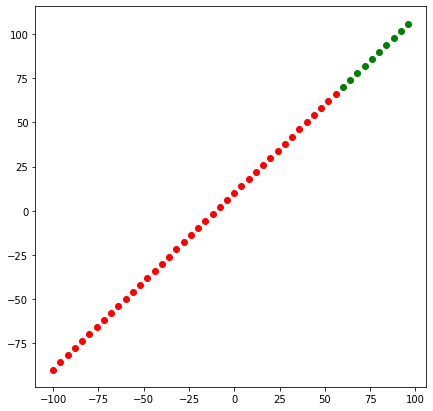

In [11]:
plt.figure(figsize=(7,7))

plt.scatter(X_train,y_train,c='g',label="Training Sets")
plt.scatter(X_test,y_test,c='r',label="Test Sets")

# r=red g=green b=blue and so on

plt.show()

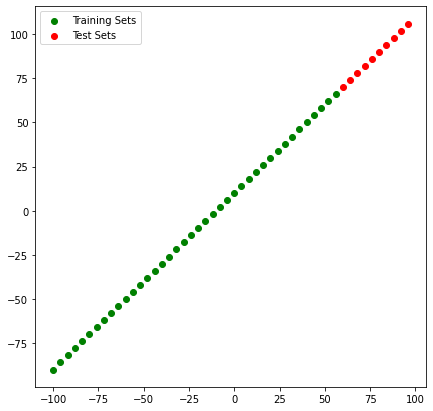

In [13]:
# Same plot diffrent command  so that it appears with the labels 
plt.figure(figsize=(7,7))

plt.scatter(X_train,y_train,c='g',label="Training Sets")
plt.scatter(X_test,y_test,c='r',label="Test Sets")
plt.legend()

In [19]:
# Bulding the model for data
tf.random.set_seed(42)
model = tf.keras.Sequential([
                  tf.keras.layers.Dense(1,activation="relu")
])
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"])

# model.fit(X_train,y_train,epochs=100)


Epoch 1/100


ValueError: ignored

In [20]:
mode.summary()

NameError: ignored

In [23]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
                  tf.keras.layers.Dense(1,input_shape=[1])
])
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Total Params : Total number of parameters

Trainable Params : Number of parameters that can be updated while training the model

Non-Trainable Params : Number of parameters that cannot be updated while training the model

## Sample below for params


In [31]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
                  tf.keras.layers.Dense(100,input_shape=[1])
])
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               200       
                                                                 
Total params: 200
Trainable params: 200
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train,y_train,epochs=5,verbose=0)

In [ ]:
'''
  Use Verbose 
  0 - no output of epochs
  1- Progressbar of epochs
  2- One line for epoch

'''

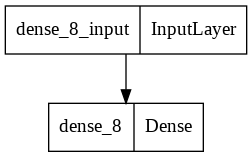

In [34]:
from tensorflow.keras.utils  import plot_model

plot_model(model)

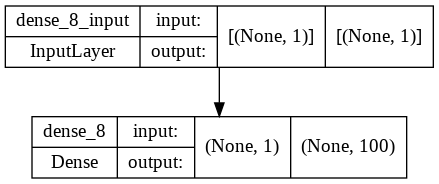

In [35]:
plot_model(model,show_shapes=True)

Custom Names

In [38]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
                  tf.keras.layers.Dense(2,input_shape=[1],name="hideenLayerOne"),
                  tf.keras.layers.Dense(1,input_shape=[1],name="hiddenLayerTwo")
],name="Model with Custom names")
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"])

model.summary()

Model: "Model with Custom names"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hideenLayerOne (Dense)      (None, 2)                 4         
                                                                 
 hiddenLayerTwo (Dense)      (None, 1)                 3         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


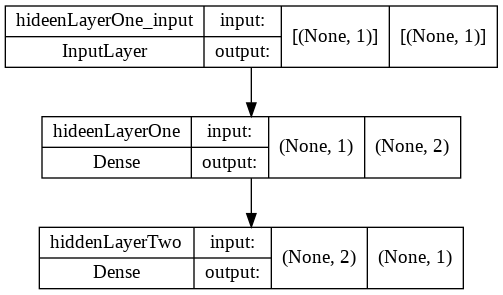

In [39]:
plot_model(model,show_shapes=True)
